Oversampling - creates new synthetic examples in a minority class
Undersampling - deletes/merges examples in a majority class

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv(r'C:\Users\babab\Documents\csci1070main\nico_csci1070_repo\diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
#resample training data with randomoversampler (naive approach)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [13]:
model = LogisticRegression(random_state=42)
model.fit(x_resampled, y_resampled)

c:\Users\babab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [14]:
y_pred = model.predict(x_test)

0.7160493827160493

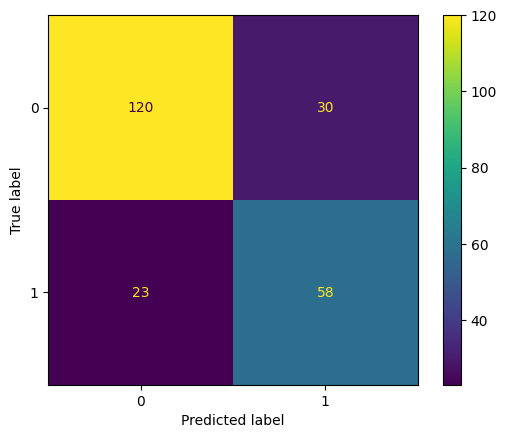

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
#this one depends on recall because it relies on diabetes, making sure that everyone who has diabetes is diagnosed
#recall = tp/(tp+fn)
58/(58+23)

In [18]:
#undersampling
#clusterCentroids uses k means to reduce the number of samples
from imblearn.under_sampling import ClusterCentroids
rus = ClusterCentroids(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [19]:
model = LogisticRegression(random_state=42)
model.fit(x_resampled, y_resampled)

c:\Users\babab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

0.6790123456790124

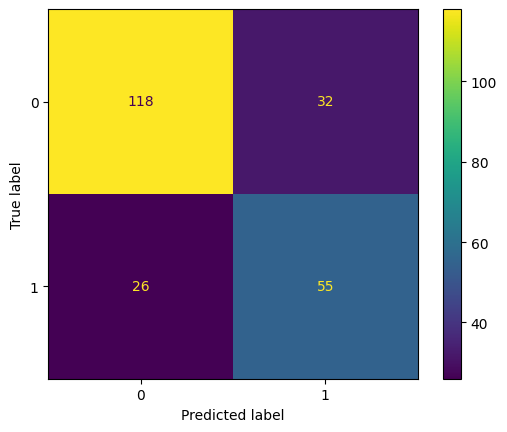

In [21]:
y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
55/(55+26)